<h2 style = "font-family:Bell MT;font-size:40px:text-align:center"> Whole data cube data preparation and training on Random Forest classifier algorithm <h2/>

In [1]:
import spectral
import numpy as np
import pandas
from PIL import Image
from skimage import color
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore') # don't display warnnings
%matplotlib inline

In [2]:
hdl = spectral.open_image('frt00008fc1_07_if166j_mtr3.hdr') # header file (meta data)
# which optimizes the accessability of the whole datacube. 

In [3]:
len(hdl.bands.centers) # This tells us the number of bands 

489

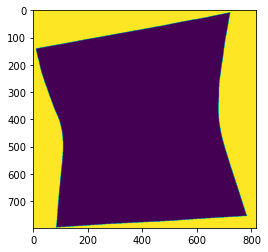

In [4]:
img = hdl.read_band(488)
plt.imshow(img)

In [5]:
len_slices = 489
n_slices = 50

# we may get periodic slices (choosing band 50 out of 489)
slices_period = np.linspace(start=0, stop=len_slices-1, num=n_slices).astype(int)

# print(slices_period)
cube = hdl.read_bands(slices_period)
cube.shape[2] # Indicates (shows) the third dimention of the cube which is the wavelength bands

50

In [6]:
slices_period # Our randomly choosen 50 wavelength bands out of 489

array([  0,   9,  19,  29,  39,  49,  59,  69,  79,  89,  99, 109, 119,
       129, 139, 149, 159, 169, 179, 189, 199, 209, 219, 229, 239, 248,
       258, 268, 278, 288, 298, 308, 318, 328, 338, 348, 358, 368, 378,
       388, 398, 408, 418, 428, 438, 448, 458, 468, 478, 488])

In [8]:
imgs_list  = [np.squeeze(x) for x in np.dsplit(cube,50)] # 

In [9]:
#for _img in imgs_list:
    #print(_img.shape) # Checking each band size 

In [10]:
pixel_vectors = [_img.flatten() for _img in imgs_list] # Flattening each images then makes it image vector (one dimention)
len(pixel_vectors) # check the size of the image 

50

In [11]:
pixel_vectors = np.asarray(pixel_vectors) # change the vector image in to array format
pixel_vectors.T.shape # Transpose the data as it should be ... 50 wavelength bands with 653562 pixel associated with their wavelength bands from the data cube

(653562, 50)

In [12]:
#df = pandas.DataFrame(data=pixel_vectors.T) # Creating a DataFrame out of the data cube
#df.sample(3) 

In [13]:
wv_names = [str(hdl.bands.centers[i])+'(nm)' for i in slices_period] # Creating the DataFrame and put the measurment scale (nm)

In [14]:
df2 = pandas.DataFrame(data=pixel_vectors.T, columns=wv_names)

In [15]:
df2.sample(5)

,436.13(nm),494.68(nm),559.78(nm),624.92(nm),761.87(nm),827.15(nm),892.48(nm),957.85(nm),1053.75(nm),1119.28(nm),...,3297.44(nm),3363.88(nm),3430.36(nm),3496.87(nm),3563.43(nm),3630.02(nm),3696.65(nm),3763.31(nm),3830.02(nm),3896.76(nm)
604047,0.056524,0.073714,0.116854,0.167340,0.195450,0.189506,0.182579,0.173970,0.168815,0.171615,...,0.097982,0.114518,0.133684,0.147815,0.176526,0.196316,0.224504,0.234992,0.245121,0.265098
526504,0.057438,0.075360,0.119072,0.173629,0.203257,0.197798,0.190806,0.180087,0.175738,0.177679,...,0.090152,0.109754,0.128689,0.143987,0.173769,0.191126,0.216359,0.225461,0.242090,0.244146
462595,0.056132,0.073618,0.116344,0.166379,0.193187,0.186893,0.178577,0.167850,0.174777,0.175526,...,0.085966,0.102944,0.119129,0.129646,0.156017,0.173065,0.196972,0.209785,0.225835,0.232372
169500,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000
139210,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000


In [16]:
df2.columns

Index(['436.13(nm)', '494.68(nm)', '559.78(nm)', '624.92(nm)', '761.87(nm)',
       '827.15(nm)', '892.48(nm)', '957.85(nm)', '1053.75(nm)', '1119.28(nm)',
       '1184.85(nm)', '1250.45(nm)', '1316.08(nm)', '1381.75(nm)',
       '1447.45(nm)', '1513.18(nm)', '1578.95(nm)', '1644.74(nm)',
       '1710.58(nm)', '1776.44(nm)', '1842.34(nm)', '1908.27(nm)',
       '1974.24(nm)', '2040.24(nm)', '2106.27(nm)', '2165.72(nm)',
       '2231.82(nm)', '2297.95(nm)', '2364.11(nm)', '2430.3(nm)',
       '2496.53(nm)', '2562.51(nm)', '2628.53(nm)', '2833.43(nm)',
       '2899.6(nm)', '2965.81(nm)', '3032.06(nm)', '3098.35(nm)',
       '3164.68(nm)', '3231.04(nm)', '3297.44(nm)', '3363.88(nm)',
       '3430.36(nm)', '3496.87(nm)', '3563.43(nm)', '3630.02(nm)',
       '3696.65(nm)', '3763.31(nm)', '3830.02(nm)', '3896.76(nm)'],
      dtype='object')

In [25]:
# df2.info()

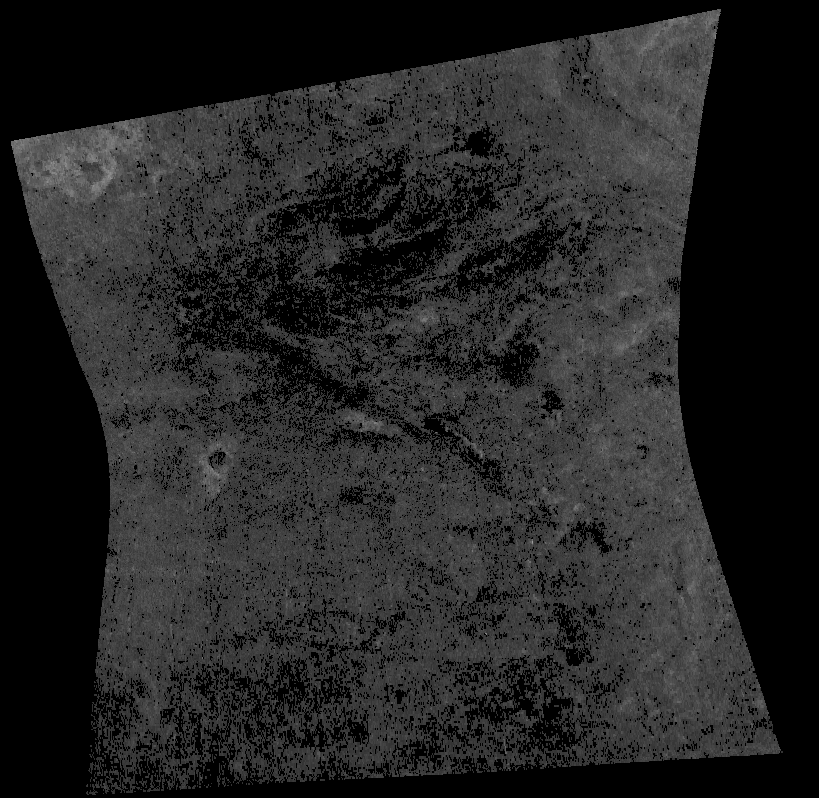

In [26]:
y17_tar = Image.open("7_OLINDEX3_Thresholded.png")
y17_tar  # Target image variable 

In [16]:
y17_tar_f = plt.imread('7_OLINDEX3_Thresholded.png') # To flatten an image the image should be change in to image array
y17_tar_flat = y17_tar_f.flatten() # Flattening each images then makes it image vector (one dimention)
y17_tar_flat.shape # Check the size of the image if it has the same size with the X value (yes they both have the same value)

(653562,)

<p size= '40'> Get the mean value of the gray scale image to do thresholding <p/>

In [17]:
_uniqe = set(y17_tar_flat) # Get the unique value out of 653562 pixel image
l_uniqe = list(_uniqe) # Change the set object in to list
arr_uniqe = np.array(l_uniqe) # Change the list in to numpy array
mean_uniqe = np.mean(arr_uniqe) # Calculate mean value of the pixel value
mean_uniqe # So we can use this value (as a tresh value) to segment the image   

0.37509602

In [29]:
# Change gray scale to binary
bw = y17_tar.point(lambda x: 0 if x < 0.37509602 else 255, '1')  # binarization
bw.save("bi_bw.png") # save it

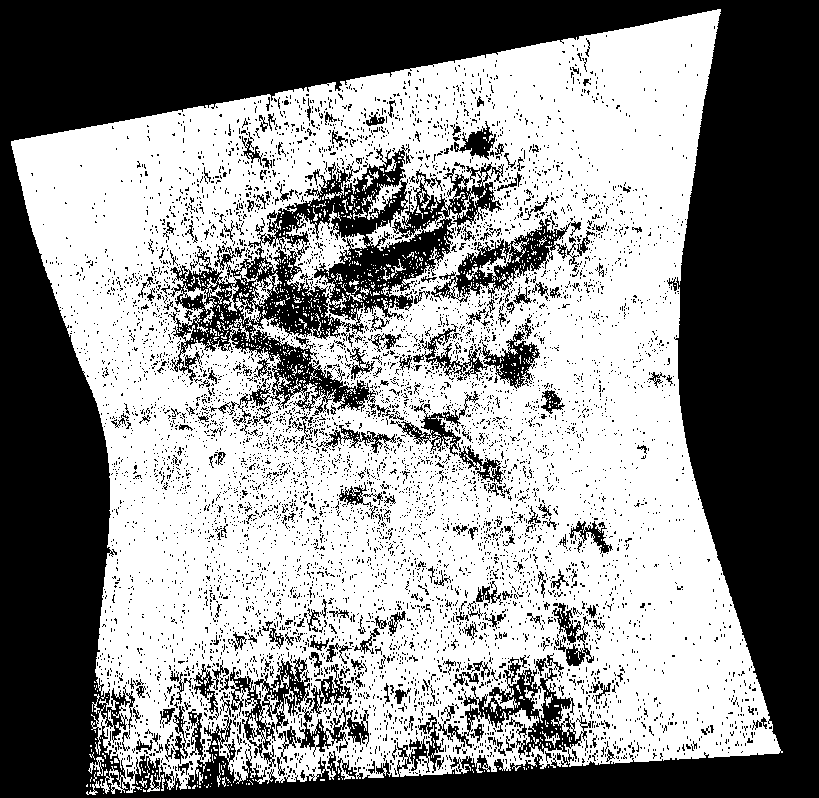

In [30]:
# Visualize the binary image
show_binary = Image.open("bi_bw.png")
show_binary

In [31]:
# Flatening the binerized image
binary = plt.imread('bi_bw.png') # To flatten an image the image should be change in to image array
binary_flat = binary.flatten() # Flattening each images then makes it image vector (one dimention)
binary_flat.shape

(653562,)

In [32]:
set(binary_flat)# Chack the contenet of the image 

{0.0, 1.0}

<p> In general we have assigned avaue 1 to 'white' pixels (pixel with mineral detected) and value 0 'black' (pixels with out (pixel information) mineral) <p/>

In [33]:
# Let's chack how many of the pixels hold '0' and how many of them hold '1'
tresh = 0.37509602 # Do binary thresholding
zeros = []
ones= []

for p in y17_tar_flat:
    if p < tresh:
        zeros.append(p)
    else:
        ones.append(p)

In [34]:
len(zeros) # We have 646165 0 values (black) out of 653562 image pixel, this implies that there is no pixel information in that particular pixel,
# Which means there is no mineral detected on that pixel.

646165

In [35]:
len(ones) # We have 7397 1 (white) values out of 653562 image pixel, this implies that there is pixel information in that particular pixel,
# Which means mineral is detected on that pixel.

7397

In [36]:
# Create a pandas series for the target value 'Y'
y = pandas.Series(binary_flat)
y.sample(3) # Check the first 3 elements of the target 

111149    1.0
629774    0.0
484740    1.0
dtype: float32

In [37]:
len(y)

653562

In [38]:
df3 = pandas.DataFrame(y)
df3.columns = ['target']
df3.shape

(653562, 1)

In [39]:
df3.sample(3)

,target
388396,0.0
306730,1.0
311389,1.0


In [40]:
frames = pandas.concat([df2, df3], axis=1, sort=False)
frames.sample(3)

,436.13(nm),494.68(nm),559.78(nm),624.92(nm),761.87(nm),827.15(nm),892.48(nm),957.85(nm),1053.75(nm),1119.28(nm),...,3363.88(nm),3430.36(nm),3496.87(nm),3563.43(nm),3630.02(nm),3696.65(nm),3763.31(nm),3830.02(nm),3896.76(nm),target
193917,0.056792,0.073589,0.119044,0.175020,0.209955,0.204308,0.198070,0.188515,0.188796,0.192623,...,0.099941,0.114521,0.129415,0.155582,0.171797,0.192782,0.203506,0.215916,0.219574,1.0
61218,0.058059,0.074699,0.117357,0.164310,0.194547,0.189432,0.181530,0.169487,0.164677,0.168094,...,0.099279,0.115588,0.132233,0.161084,0.182116,0.200025,0.212437,0.224813,0.229457,1.0
71121,0.058534,0.075293,0.116227,0.161949,0.189638,0.181231,0.172418,0.163870,0.159262,0.162094,...,0.093967,0.110477,0.127241,0.155465,0.173823,0.193267,0.209247,0.232665,0.235719,1.0


In [43]:
len(frames)

653562

<p> let's extract the "No Data" value from the data frame <p/>

In [10]:
# help(frames.dropna)

In [56]:
frames[frames == 65535.0] = None # Give 'None' value for all 65535.0 record in the data frame name "frames" becouse in this data 65535.0 is represents 'No data'.

In [57]:
new_frame = frames.dropna(how = "any")
new_frame.head()

,436.13(nm),494.68(nm),559.78(nm),624.92(nm),761.87(nm),827.15(nm),892.48(nm),957.85(nm),1053.75(nm),1119.28(nm),...,3363.88(nm),3430.36(nm),3496.87(nm),3563.43(nm),3630.02(nm),3696.65(nm),3763.31(nm),3830.02(nm),3896.76(nm),target
8088,0.056497,0.072392,0.110154,0.150998,0.171393,0.163230,0.152445,0.144503,0.142712,0.144521,...,0.103474,0.120436,0.138172,0.159248,0.177660,0.205020,0.222804,0.251356,0.267813,1.0
8089,0.056497,0.072392,0.110154,0.150998,0.171393,0.163230,0.152445,0.144503,0.142712,0.144521,...,0.103474,0.120436,0.138172,0.159248,0.177660,0.205020,0.222804,0.251356,0.267813,1.0
8090,0.057104,0.071551,0.109121,0.149160,0.168166,0.160498,0.150483,0.143821,0.140015,0.141872,...,0.098309,0.115489,0.132625,0.160828,0.178812,0.203913,0.222083,0.254336,0.265433,1.0
8091,0.057104,0.071551,0.109121,0.149160,0.168166,0.160498,0.150483,0.143821,0.140015,0.141872,...,0.098309,0.115489,0.132625,0.160828,0.178812,0.203913,0.222083,0.254336,0.265433,1.0
8902,0.056057,0.071477,0.108903,0.147823,0.170496,0.162417,0.153432,0.147417,0.140836,0.143069,...,0.098752,0.115521,0.129981,0.158952,0.181639,0.205958,0.225349,0.248403,0.261450,1.0


In [50]:
features_x = new_frame.drop('target' , axis = 'columns') # Creating the features 
target_y = new_frame['target'] # creating the target value 

In [51]:
target_y.head() # Checking the first 5 elements of the target variable

8088    1.0
8089    1.0
8090    1.0
8091    1.0
8902    1.0
Name: target, dtype: float32

In [52]:
# features_x # Checking the first 5 elements of the feature

In [53]:
x = features_x
y = target_y

In [54]:
# Let's split the data in to train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, train_size = 0.8)

<h2 style = "font-family:Bell MT;font-size:40px:text-align:center"> Support Vector Machine <h2/>

In [41]:
s_model = SVC()

In [42]:
s_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
s_model.score(x_test,y_test)

0.8061338101825297

<h2 style = "font-family:Bell MT;font-size:40px:text-align:center">When regularization value is 10 <h2/>

In [44]:
s_model = SVC(C=10)

In [45]:
s_model.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [46]:
s_model.score(x_test,y_test)

0.8061338101825297

<h2 style = "font-family:Bell MT;font-size:40px:text-align:center"> Kernel linear <h/>

In [51]:
s_model = SVC(kernel='linear')

In [52]:
s_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [53]:
s_model.score(x_test,y_test)

0.8064374641519619

<h2 style = "font-family:Bell MT;font-size:40px:text-align:center"> When gamma value is 20 <h2/>

In [47]:
s_model = SVC(gamma=20)

In [48]:
s_model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=20, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
s_model.score(x_test,y_test)

0.871430660053758

<h2 style = "font-family:Bell MT;font-size:40px:text-align:center"> Random Forest <h2/>

In [100]:
random = RandomForestClassifier(n_estimators = 1000)

In [101]:
random.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
random.score(x_test,y_test) # Very good result

0.9491998155583297

In [125]:
random.feature_importances_ # Let's calulate which variable is important out of the 50 wavelength bands to do the prediction more accuretly.

array([0.02566362, 0.0280651 , 0.01784152, 0.01469887, 0.01495074,
       0.01430484, 0.01751562, 0.0249912 , 0.02393132, 0.02411171,
       0.03415625, 0.04304893, 0.02025801, 0.01570705, 0.01700655,
       0.017123  , 0.02116283, 0.02624351, 0.03704976, 0.02929411,
       0.01972575, 0.01664485, 0.01618421, 0.01525446, 0.01470702,
       0.01378594, 0.01315507, 0.01288325, 0.01216801, 0.01243873,
       0.01273205, 0.01636943, 0.01440272, 0.01804953, 0.01610029,
       0.0213473 , 0.02207978, 0.01670894, 0.0285434 , 0.02234171,
       0.03087283, 0.02925245, 0.02031011, 0.01937145, 0.01805933,
       0.01460332, 0.01431116, 0.01540071, 0.02043543, 0.01463624])

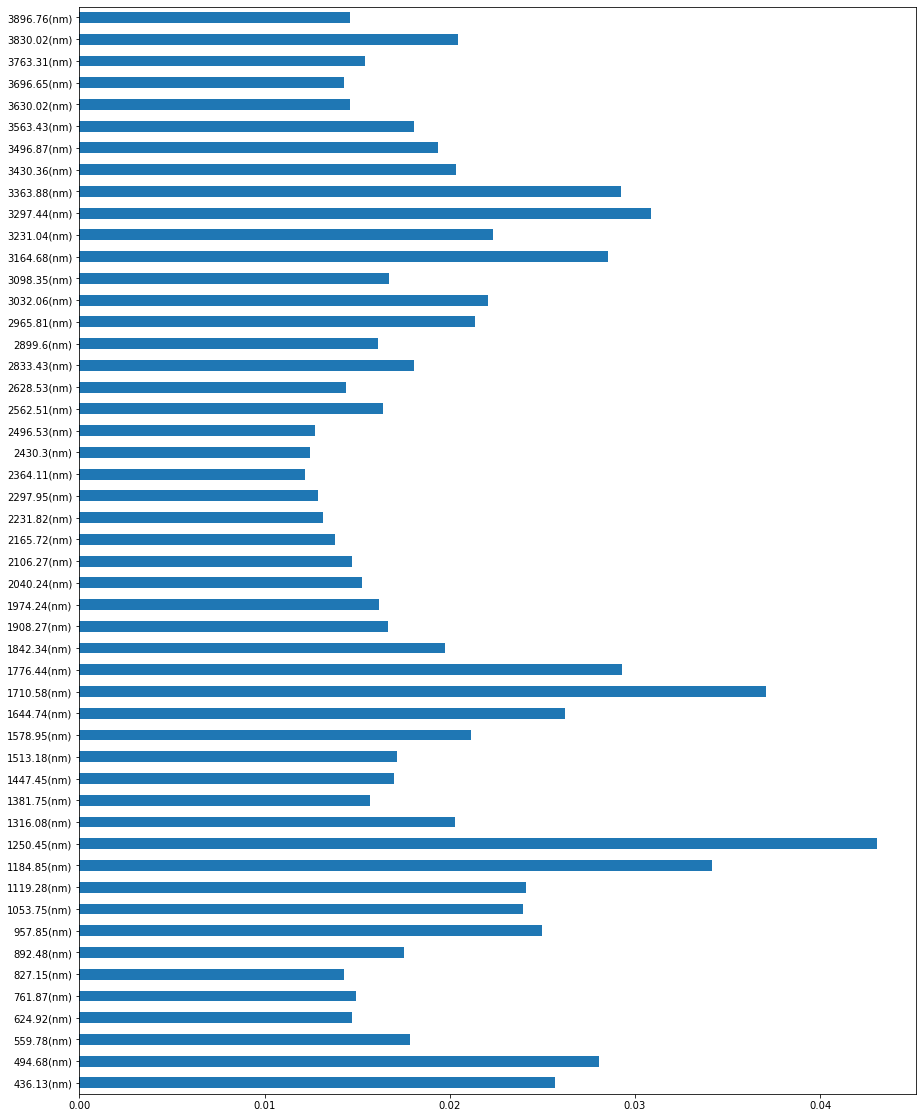

In [127]:
fet_importance = pandas.Series(random.feature_importances_, index = x_train.columns)
fet_importance.sort_values()
fet_importance.plot(kind = 'barh', figsize=(15,20)) # Visualizing the variables 

<p> Let's take a tresh value of 0.01 implies that variables which their values more than 0.04 in the above bargraph is the most impotant variables.<p/>

<h3> n_jobs <h3/>

In [40]:
%%timeit
r_mod = RandomForestClassifier(100, oob_score = True, n_jobs = 1, random_state = 42)
r_mod.fit(x_train, y_train)

7min 17s ± 22.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
r_mod = RandomForestClassifier(100, oob_score = True, n_jobs =-1, random_state = 42)
r_mod.fit(x_train, y_train)

The slowest run took 7.25 times longer than the fastest. This could mean that an intermediate result is being cached.
5min 26s ± 6min 11s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()